# The Battle of the Neighborhoods - Week 2
### Part 4: Download and Explore Farmers Market dataset

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y
import seaborn as sns

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# Data from website - https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
FM_NYC = pd.read_csv("https://data.cityofnewyork.us/api/views/8vwk-6iz2/rows.csv?accessType=DOWNLOAD&bom=true&format=true")

In [5]:
FM_NYC.head()

,Borough,Market Name,Street Address,Community District,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,107,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,No,No,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,204,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,8/12/20-11/25/20,Yes,No,No,No,"(40.839882, -73.916783)"
3,Manhattan,Fulton Stall Market,Pier 17 Square,101,40.705799,-74.002572,Sunday,11am-5pm,04/26/2020-11/22/2020,Yes,No,No,No,"(40.705799, -74.002572)"
4,Queens,Corona Greenmarket,Roosevelt Ave & 103rd St,404,40.749811,-73.861668,Friday,8am - 3pm,6/19 to 11/27,Yes,No,No,No,"(40.749811, -73.861668)"


In [6]:
# FM_NYC_filtered 
FM_NYC_filtered = FM_NYC
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(138, 14)


,Borough,Market Name,Street Address,Community District,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,107,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,No,No,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,204,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,8/12/20-11/25/20,Yes,No,No,No,"(40.839882, -73.916783)"
3,Manhattan,Fulton Stall Market,Pier 17 Square,101,40.705799,-74.002572,Sunday,11am-5pm,04/26/2020-11/22/2020,Yes,No,No,No,"(40.705799, -74.002572)"
4,Queens,Corona Greenmarket,Roosevelt Ave & 103rd St,404,40.749811,-73.861668,Friday,8am - 3pm,6/19 to 11/27,Yes,No,No,No,"(40.749811, -73.861668)"


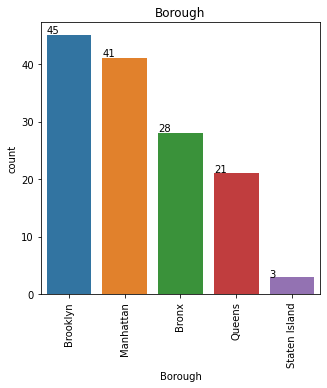

In [7]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [10]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['Market Name'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets